# <b><u> Project Title : Live Class Monitoring System - Face emotion Recognition</u></b>

## <b> Problem Description </b>

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.


In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

## Problem Statement

We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.
The solution to this problem is by recognizing facial emotions.


## <b> Data Description </b>

### <b> FER-2013 Data

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.

 # Data Pre-Processing and Sequential CNN Model Building :
 
 # Data Pre-Processing


It Contains several steps like :


- Data Collection
- Data Import
- Data Inspection
- Data Splitting
- Resizing image data

# Feature Extraction

##### In Traditional Machine Learning
 Input Image >> Feature Selections >> Classifier >> Result 

##### In Deep Learning
 Input Image >> Neural Network >> Result

   #### For CNN
 Input Layer >> Hidden Layers >> Output
>> Here, input layer takes the input and output gives the desired output.
>> That means hidden layer is doing some feature extractions.
>> And if we extract the outputs of the hidden layers, then we will get different features. 

So basically, In ML we have to create our own feature vector, 
while for DL algorithms they extract features automatically in convolution layers.

#### A CNN is composed of two basic parts of feature extraction and classification. 

- Feature extraction includes several convolution layers followed by max-pooling and an activation function.


- The classifier usually consists of fully connected layers. 


- CNN automatically detects the important features without any human supervision


- And it makes efficient model which performs automatic feature extraction to achieve superhuman accuracy

# CNN Model Building Details :
- The main building block of CNN is the convolutional layer.

- Convolution is a mathematical operation to merge two sets of information. 
- In our case the convolution is applied on the input data using a convolution filter 
  to produce a feature map.
- After a convolution operation we usually perform pooling to reduce the dimensionality. 
  This enables us to reduce the number of parameters, 
  which both shortens the training time and combats overfitting. 
- Pooling layers downsample each feature map independently, reducing the height and width.

- The output of both convolution and pooling layers are 3D volumes, 
  but a fully connected layer expects a 1D vector of numbers. 
- So we flatten the output of the final pooling layer to a vector 
  and that becomes the input to the fully connected layer. 
- Flattening is simply arranging the 3D volume of numbers into a 1D vector.

Let's start the coding....

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam #optimizer is use to minimize the loss function
from keras.preprocessing.image import ImageDataGenerator

# Initialize image data generator with rescaling, this is the augmentation configuration we will use for training data, It generates more images using below parameters
#Rescale : One of many augmentation parameters, adjusts the pixel values of our image,
#Setting rescale = 1./255 will adjust our pixel values to be between 0–1.

train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
# this is a generator that will read pictures found at train_data_path, and indefinitely generate batches of augmented image data
train_generator = train_data_gen.flow_from_directory(
        '/content/drive/MyDrive/Almabetter/Data Science Capstone Projects/Live Class Monitoring System [Face emotion Recognition] - Prashant Gaikwad/data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        '/content/drive/MyDrive/Almabetter/Data Science Capstone Projects/Live Class Monitoring System [Face emotion Recognition] - Prashant Gaikwad/data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

# Train the neural network/model
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch= 8369 // 64,
        epochs=100,
        validation_data=validation_generator,
        validation_steps= 1735 // 64)

# save model structure in jason file
model_json = emotion_model.to_json()
with open("/content/drive/MyDrive/Almabetter/Data Science Capstone Projects/Live Class Monitoring System [Face emotion Recognition] - Prashant Gaikwad/model/emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('/content/drive/MyDrive/Almabetter/Data Science Capstone Projects/Live Class Monitoring System [Face emotion Recognition] - Prashant Gaikwad/model/emotion_model.h5')


Found 8369 images belonging to 7 classes.
Found 1735 images belonging to 7 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
130/130 [==============================] - 51s 392ms/step - loss: 1.8029 - accuracy: 0.2213 - val_loss: 1.8781 - val_accuracy: 0.1979
Epoch 2/100
130/130 [==============================] - 53s 404ms/step - loss: 1.7760 - accuracy: 0.2396 - val_loss: 1.8508 - val_accuracy: 0.2043
Epoch 3/100
130/130 [==============================] - 53s 407ms/step - loss: 1.7250 - accuracy: 0.2936 - val_loss: 1.8139 - val_accuracy: 0.2963
Epoch 4/100
130/130 [==============================] - 53s 407ms/step - loss: 1.6502 - accuracy: 0.3565 - val_loss: 1.7309 - val_accuracy: 0.3565
Epoch 5/100
130/130 [==============================] - 53s 408ms/step - loss: 1.5859 - accuracy: 0.3884 - val_loss: 1.6938 - val_accuracy: 0.3686
Epoch 6/100
130/130 [==============================] - 53s 411ms/step - loss: 1.5465 - accuracy: 0.4149 - val_

In [ ]:
import cv2
import numpy as np
from keras.models import model_from_json


emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

# pass here your video path
cap = cv2.VideoCapture("sample video/sample zoom recording.mp4")

while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1280, 720))
    if not ret:
        break
    face_detector = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Loaded model from disk


<img src="images/Screenshot (449).png">

In [ ]:
import cv2
import numpy as np
from keras.models import model_from_json


emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

# start the webcam feed
cap = cv2.VideoCapture(0)

while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1280, 720))
    if not ret:
        break
    face_detector = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Loaded model from disk


<img src="images/Screenshot (453).png">
<img src="images/Screenshot (456).png">
<img src="images/Screenshot (457).png">
<img src="images/Screenshot (458).png">
<img src="images/Screenshot (460).png">
<img src="images/Screenshot (465).png">

# Evaluate Emotion Detector

Loaded model from disk
Found 1735 images belonging to 7 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


-----------------------------------------------------------------
[[ 45   8   5  60  67 107  40]
 [ 10   2   8  18  18  22  13]
 [ 19   4   1  23  27  36  20]
 [ 43   4   5  58  52  86  29]
 [ 33   8   5  61  63 123  49]
 [ 33  10   6  76  76 102  43]
 [ 31   7   6  48  40  55  30]]


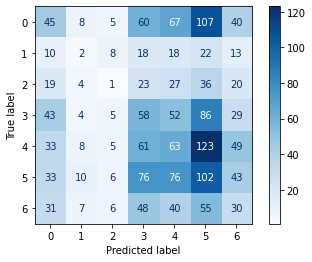

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.21      0.14      0.16       332
           1       0.05      0.02      0.03        91
           2       0.03      0.01      0.01       130
           3       0.17      0.21      0.19       277
           4       0.18      0.18      0.18       342
           5       0.19      0.29      0.23       346
           6       0.13      0.14      0.14       217

    accuracy                           0.17      1735
   macro avg       0.14      0.14      0.14      1735
weighted avg       0.16      0.17      0.16      1735



In [ ]:
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay


emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('/content/drive/MyDrive/Almabetter/Data Science Capstone Projects/Live Class Monitoring System [Face emotion Recognition] - Prashant Gaikwad/model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("/content/drive/MyDrive/Almabetter/Data Science Capstone Projects/Live Class Monitoring System [Face emotion Recognition] - Prashant Gaikwad/model/emotion_model.h5")
print("Loaded model from disk")

# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        '/content/drive/MyDrive/Almabetter/Data Science Capstone Projects/Live Class Monitoring System [Face emotion Recognition] - Prashant Gaikwad/data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# do prediction on test data
predictions = emotion_model.predict_generator(test_generator)

print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))

The confusion matrix clearly shows that our model is doing good job on the class Happy, Neutral, Sad, Surprised, Angry, but it's performance is low on Fearful and Disgusted class. 

One of the reason for this could be the fact that these two classes have less data. But when I looked at the images I found some images from these two classes are even hard for a human to tell whether the person is sad or neutral. Facial expression depends on individual as well. Some person's neutral face looks more like Fearful and Disgusted.

# Conclusion:

In this Project, we have seen how to preprocess image data, design a network that is capable of classifying the emotions, and then use Opencv
for the detection of the faces and then pass it for prediction.

The Project aims to create a system that automatically supports teachers and related education.

Aims to create a system that automatically supports teachers and skills related to monitoring student behavior. 

The system will serve as an important factor in decision-making processes. 

The results of the emotion detection algorithm gave average
accuracy up to 96% for Convolutional Neural Network model.

The confusion matrix clearly shows that our model is doing good job on the class Happy, Neutral, Sad, Surprised, Angry, but it's performance is low on Fearful and Disgusted class. 